# Load dataset

In [ ]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
TRAIN_FILENAME = "WineDataset.csv"

df = pd.read_csv(TRAIN_FILENAME)

df.head()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [ ]:
df.describe(include='all')

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


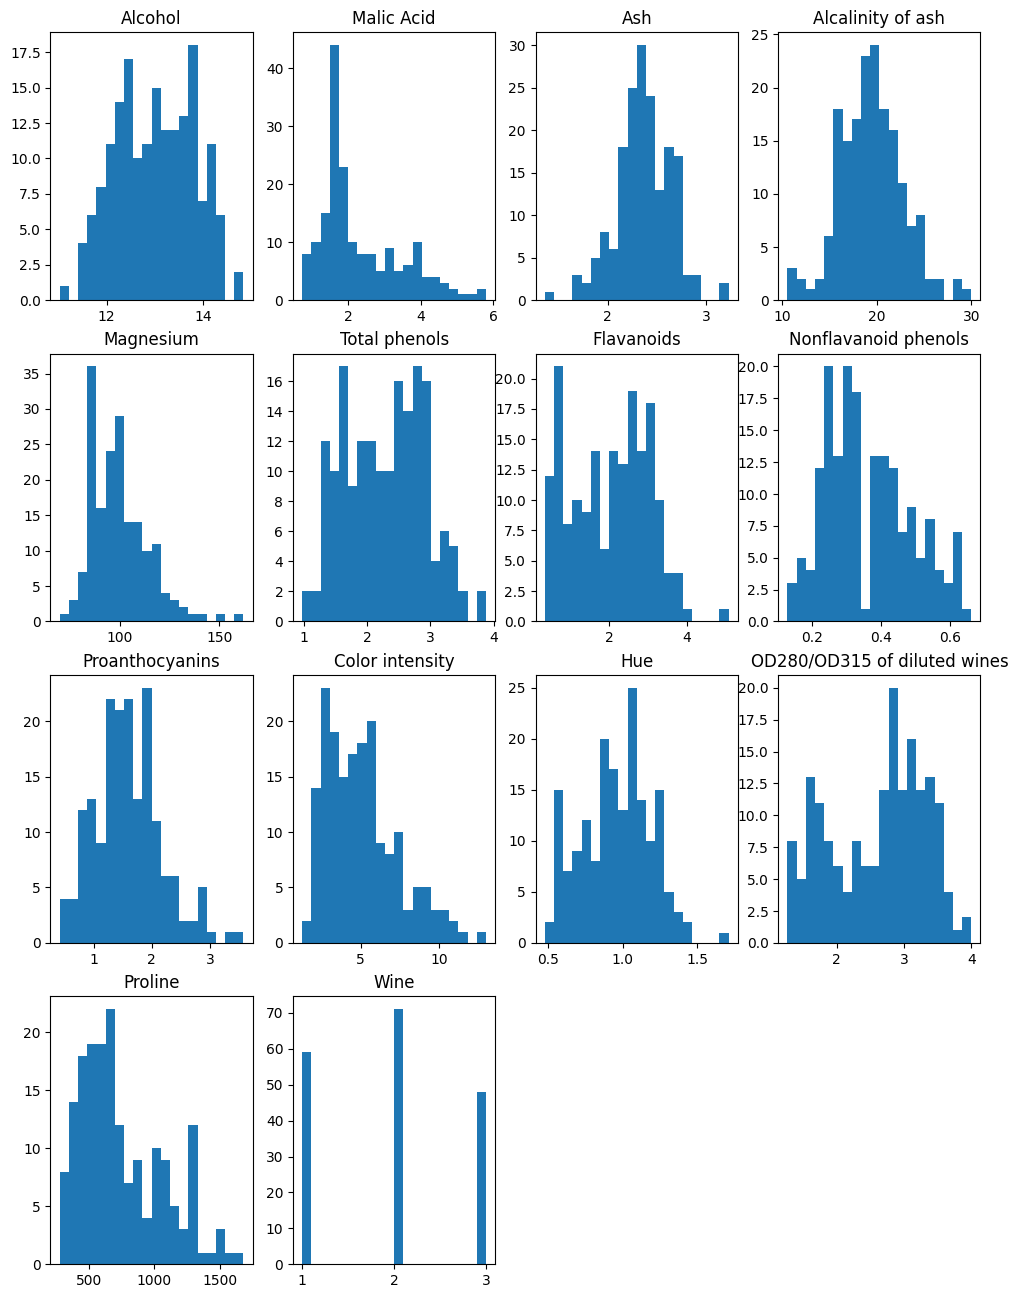

In [ ]:
plt.figure(figsize=(12, 16))
cols = df.columns
plt_size = int(np.sqrt(len(cols) - 1)) + 1

for i, col in enumerate(cols):
    plt.subplot(plt_size, int((len(cols) - 1) / plt_size) + 1, i + 1)
    plt.title(col)
    plt.hist(df[col], bins=20)

# Prepare

In [ ]:
df.isna().sum()

Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Wine                            0
dtype: int64

In [ ]:
from pandas import DataFrame

class Normalise:
    def __init__(self, standart: bool = True):
        self.coefs = None
        self.standart = standart

    def fit_transform(self, data: DataFrame):
        self.fit(data)
        return self.transform(data)

    def fit(self, data: DataFrame):
        if self.standart:
            self.coefs = pd.concat({"mean": data.mean(), "std": data.std()}, axis = 1)
        else:  # Min-Max
            self.coefs = pd.concat({"min": data.min(), "max": data.max()}, axis = 1)

    def transform(self, data: DataFrame):
        if self.coefs is None:
            raise Exception("Can't transform without train")

        if set(data.columns) ^ set(self.coefs.index):
            raise Exception("Columns of data not matching train data!")

        if self.standart:
            return (data - self.coefs['mean']) / self.coefs['std']
        else:
            return (data - self.coefs['min']) / (self.coefs['max'] - self.coefs['min'])

    def restore(self, data: DataFrame):
        if self.coefs is None:
            raise Exception("Can't restore without train")

        rest_df = DataFrame()

        for col in data.columns:
            coef = self.coefs.iloc[col]

            if self.standart:
                rest_df[col] = data[col] * coef['std'] + coef['mean']
            else:
                rest_df[col] = data[col] * (self.coefs['max'] - self.coefs['min']) + coef['min']

        return rest_df

In [ ]:
scaler = Normalise(standart = True)

df_norm, labels = df.drop('Wine', axis=1), df['Wine']
df_norm = scaler.fit_transform(df_norm)
# df_norm = df

df_norm.head()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [ ]:
def train_test_split(data, labels, train_size=0.8, shuffle=True, random_state=None):
    assert data.shape[0] == labels.shape[0]

    sz = data.shape[0]

    if shuffle:
        perm = np.random.default_rng(seed=random_state).permutation(sz)
        data = data.iloc[perm]
        labels = labels.iloc[perm]

    if 0 < train_size < 1:
        train_size = int(train_size * sz)

    return data[:train_size], data[train_size:], labels[:train_size], labels[train_size:]

Correlation with Wine col:
Alcohol                        -0.328222
Malic Acid                      0.437776
Ash                            -0.049643
Alcalinity of ash               0.517859
Magnesium                      -0.209179
Total phenols                  -0.719163
Flavanoids                     -0.847498
Nonflavanoid phenols            0.489109
Proanthocyanins                -0.499130
Color intensity                 0.265668
Hue                            -0.617369
OD280/OD315 of diluted wines   -0.788230
Proline                        -0.633717
Wine                            1.000000
Name: Wine, dtype: float64


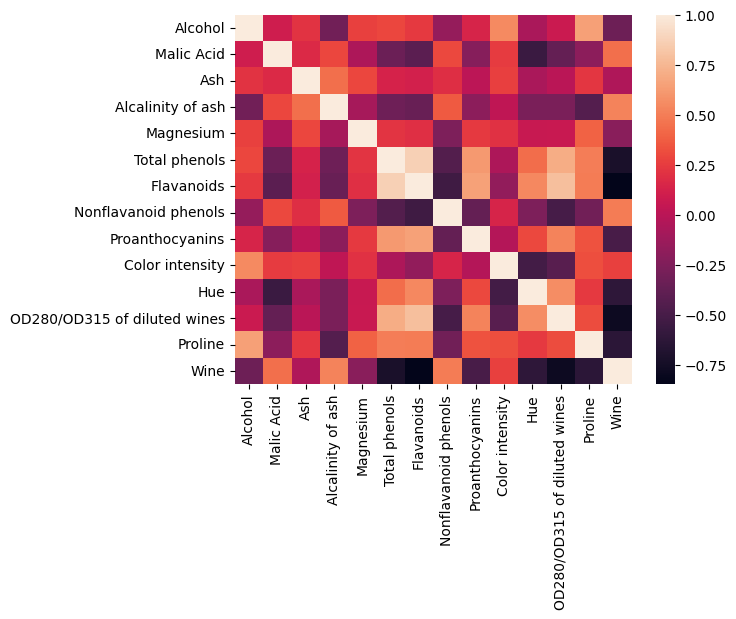

In [ ]:
import seaborn as sns

sns.heatmap(df.corr())

print("Correlation with Wine col:", df.corr()["Wine"], sep='\n')

# Train

In [ ]:
from pandas import DataFrame, Series

class Metrics:
    @staticmethod
    def most_common(lst):
        return max(set(lst), key=lst.count)

    @staticmethod
    def euclidean_distance(from_point, to_points):
        return np.sqrt(np.sum(np.square(to_points - from_point), axis=1))

    @staticmethod
    def manhattan_distance(from_point, to_points):
        return np.sum(np.abs(to_points - from_point), axis=1)


class KNeighborsClassifier():
    def __init__(self, k, dist_metric = Metrics.euclidean_distance):
        self.k = k
        self.dist_metric = dist_metric
        self.data = None
        self.labels = None

    @staticmethod
    def prepare_data(data):
        if isinstance(data, DataFrame) or isinstance(data, Series):
            data = data.to_numpy()

        return data

    def fit(self, data, labels):
        assert data.shape[0] == labels.shape[0]

        self.data = type(self).prepare_data(data)
        self.labels = type(self).prepare_data(labels)

    def predict(self, predict_data):
        predict_data = type(self).prepare_data(predict_data)
        res = []

        for x in predict_data:
            distances = self.dist_metric(x, self.data)

            y_sorted = map(
                lambda pair: pair[1],
                sorted(
                    zip(distances, self.labels)
                )[:self.k]
            )
            res.append(Metrics.most_common(list(y_sorted)))

        return res

    def score(self, test_data, test_labels):
        assert test_data.shape[0] == test_labels.shape[0]

        test_labels = type(self).prepare_data(test_labels)

        return sum(self.predict(test_data) == test_labels) / len(test_labels)


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

def eval_model(data, labels, random_choice: bool = False):
    if random_choice:
        rand_cols = np.random.choice(data.columns, 3, replace=False)
        data = data[rand_cols]
        print("Selected columns:", ", ".join(rand_cols))

    X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=10)

    if isinstance(data, DataFrame):
        data = data.to_numpy()
    if isinstance(labels, DataFrame):
        labels = labels.to_numpy()
        print("Check")

    scores = {}
    models = {}

    check_k = list(range(2, 8)) + [10, 15, 20]

    for k in check_k:
        model = KNeighborsClassifier(k)
        model.fit(X_train, y_train)

        models[k] = model
        scores[k] = model.score(X_test, y_test)

        print(f"Model accuracy with k = {k}: {scores[k]:.4f}")

    best_k = max(scores.items(), key=lambda x: x[1])[0]

    print("\n\nBest k:", best_k)

    res = models[best_k].predict(X_test)

    # Computing recall tp / (tp + fn)
    print(f"Best model recall: {recall_score(y_test, res, average='weighted'):.4f}")
    # Computing percision tp / (tp + fp)
    print(f"Best model percision: {precision_score(y_test, res, average='weighted'):.4f}")
    # Computing F1 score = 2 * (precision * recall) / (precision + recall)
    print(f"Best model F1: {f1_score(y_test, res, average='weighted'):.4f}")

    plt.plot(scores.keys(), scores.values())
    plt.xticks(range(min(check_k) - 2, max(check_k) + 3))
    plt.show()

    conf_matr = confusion_matrix(y_test, res)
    sns.heatmap(conf_matr, annot=True, fmt="g")

    return scores

Model accuracy with k = 2: 0.9167
Model accuracy with k = 3: 0.9444
Model accuracy with k = 4: 0.9444
Model accuracy with k = 5: 0.9444
Model accuracy with k = 6: 0.9444
Model accuracy with k = 7: 0.9444
Model accuracy with k = 10: 0.9444
Model accuracy with k = 15: 0.9444
Model accuracy with k = 20: 0.9444


Best k: 3
Best model recall: 0.9444
Best model percision: 0.9519
Best model F1: 0.9452


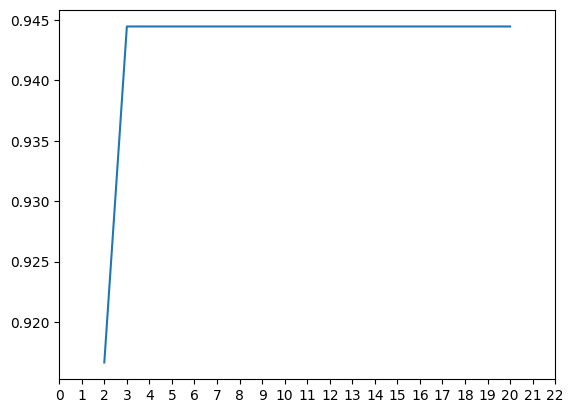

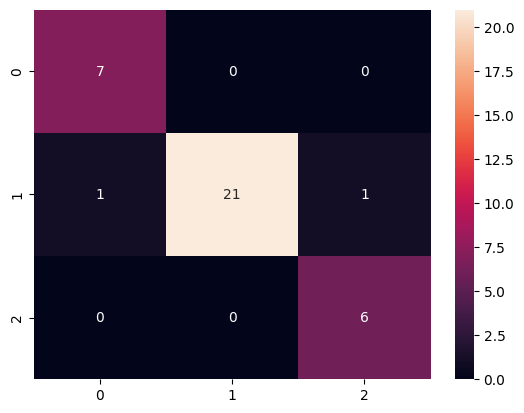

In [ ]:
cols = ["all"]

if "all" in cols:
    scores = eval_model(df_norm, labels, random_choice = False)
else:
    scores = eval_model(df_norm[cols], labels, random_choice = False)

Selected columns: Color intensity, Alcohol, Alcalinity of ash
Model accuracy with k = 2: 0.8056
Model accuracy with k = 3: 0.7778
Model accuracy with k = 4: 0.8056
Model accuracy with k = 5: 0.8056
Model accuracy with k = 6: 0.8056
Model accuracy with k = 7: 0.8056
Model accuracy with k = 10: 0.8889
Model accuracy with k = 15: 0.8611
Model accuracy with k = 20: 0.8889


Best k: 10
Best model recall: 0.8889
Best model percision: 0.8956
Best model F1: 0.8912


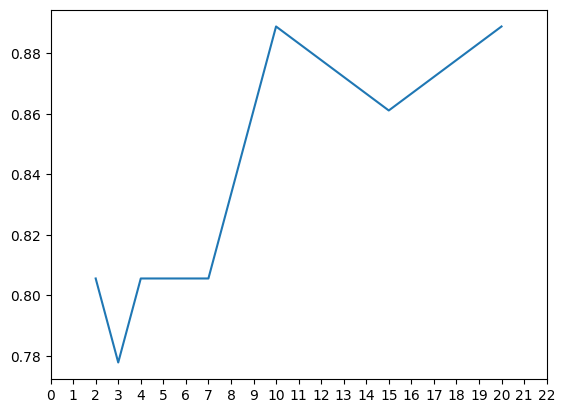

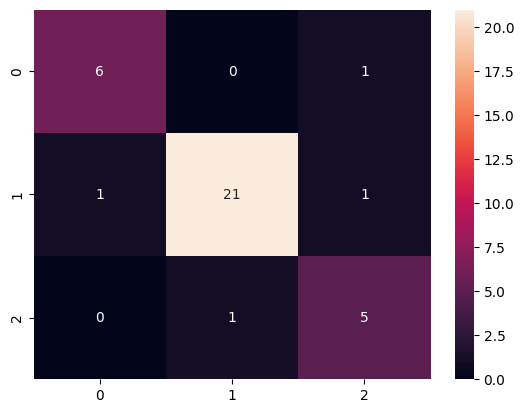

In [ ]:
# Random columns

scores = eval_model(df_norm, labels, random_choice = True)